# Classification for customer churn

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df = df.drop('customerID', axis=1)

In [42]:
yesno_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                 'PaperlessBilling']

In [7]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [9]:
df['isMale'] = df['gender']=='Male'

In [10]:
df = df.drop('gender', axis=1)

In [12]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [13]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [16]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [18]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [19]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'isMale'],
      dtype='object')

In [21]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [24]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [27]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [29]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [31]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [32]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [33]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [35]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [36]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [39]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [41]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [43]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [44]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'isMale'],
      dtype='object')

In [45]:
df['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [48]:
def str2float(x):
    try:
        return float(x)
    except:
        return 0.0

$log1p(x) = log(x+1)$

In [50]:
df['TotalCharges'] = np.log1p(df['TotalCharges'].apply(str2float))

In [52]:
y = df['Churn']=='Yes'

In [55]:
for c in yesno_columns:
    df[c] = (df[c]=='Yes').astype(int)

In [58]:
X = pd.get_dummies(df.drop('Churn', axis=1))

In [111]:
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'isMale', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

## Split data into training and test sets

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2318274)

## Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr = LogisticRegression()

In [64]:
lr.fit(X_train, y_train)

/Users/yufenghuang/miniconda3/envs/base2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
lr = LogisticRegression(solver='newton-cg', random_state=2184757)

In [69]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=2184757, solver='newton-cg')

In [70]:
y_pred = lr.predict(X_test)

In [71]:
y_pred

array([False, False, False, ..., False, False, False])

In [72]:
#accuracy, precision, recall, f1

### Accuracy

In [75]:
(y_pred == y_test).astype(int).sum()

1131

In [77]:
(y_pred != y_test).astype(int).sum()

278

In [78]:
len(y_test) - (y_pred == y_test).astype(int).sum()

278

In [76]:
len(y_test)

1409

In [80]:
accuray = (y_pred == y_test).astype(int).sum()/len(y_test); accuray

0.8026969481902059

### Precision

In [84]:
y_pred == True 

array([False, False, False, ..., False, False, False])

In [85]:
(y_pred==True).sum() # the number of predicted postive values

285

In [82]:
y_test[y_pred == True]

1513     True
1710    False
5732    False
5588     True
910      True
        ...  
4779    False
1976     True
6223     True
2280    False
471      True
Name: Churn, Length: 285, dtype: bool

In [83]:
y_test[y_pred == True].sum() # out of all predicted positive values, the number of actual positive values

191

In [88]:
precision =  y_test[y_pred == True].sum()/(y_pred==True).sum(); precision

0.6701754385964912

### Recall

In [89]:
recall =  y_pred[y_test == True].sum()/(y_test==True).sum(); recall

0.5093333333333333

### F1 score

In [91]:
f1 = 2 * precision * recall / (precision + recall); f1

0.5787878787878787

### predict the probability using logistic regression

In [92]:
lr.predict_proba(X_test)

array([[0.55924476, 0.44075524],
       [0.73528448, 0.26471552],
       [0.99411987, 0.00588013],
       ...,
       [0.83718167, 0.16281833],
       [0.98789   , 0.01211   ],
       [0.65223855, 0.34776145]])

## Decision Tree Classification

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
clf = DecisionTreeClassifier(random_state=2381234)

In [95]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2381234)

In [96]:
y_pred = clf.predict(X_test)

In [97]:
y_pred

array([ True, False, False, ..., False, False, False])

In [98]:
accuray = (y_pred == y_test).astype(int).sum()/len(y_test); accuray

0.7345635202271115

In [99]:
precision =  y_test[y_pred == True].sum()/(y_pred==True).sum(); precision

0.5013774104683195

In [100]:
recall =  y_pred[y_test == True].sum()/(y_test==True).sum(); recall

0.48533333333333334

In [101]:
f1 = 2 * precision * recall / (precision + recall); f1

0.4932249322493224

In [102]:
clf.get_depth()

22

### Visualize decision tree

In [109]:
import matplotlib.pyplot as plt

In [105]:
from sklearn import tree

In [103]:
clf2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.1, random_state=2381234)

In [104]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.1, random_state=2381234)

[Text(613.8000000000001, 380.52, 'Contract_Month-to-month <= 0.5\ngini = 0.39\nsamples = 5634\nvalue = [4140, 1494]'),
 Text(334.8, 271.8, 'MonthlyCharges <= 93.775\ngini = 0.119\nsamples = 2511\nvalue = [2352, 159]'),
 Text(223.20000000000002, 163.07999999999998, 'Contract_One year <= 0.5\ngini = 0.072\nsamples = 1885\nvalue = [1815, 70]'),
 Text(111.60000000000001, 54.360000000000014, 'gini = 0.025\nsamples = 1042\nvalue = [1029, 13]'),
 Text(334.8, 54.360000000000014, 'gini = 0.126\nsamples = 843\nvalue = [786, 57]'),
 Text(446.40000000000003, 163.07999999999998, 'gini = 0.244\nsamples = 626\nvalue = [537, 89]'),
 Text(892.8000000000001, 271.8, 'InternetService_Fiber optic <= 0.5\ngini = 0.489\nsamples = 3123\nvalue = [1788, 1335]'),
 Text(669.6, 163.07999999999998, 'tenure <= 5.5\ngini = 0.406\nsamples = 1414\nvalue = [1014, 400]'),
 Text(558.0, 54.360000000000014, 'gini = 0.489\nsamples = 604\nvalue = [346, 258]'),
 Text(781.2, 54.360000000000014, 'gini = 0.289\nsamples = 810\nval

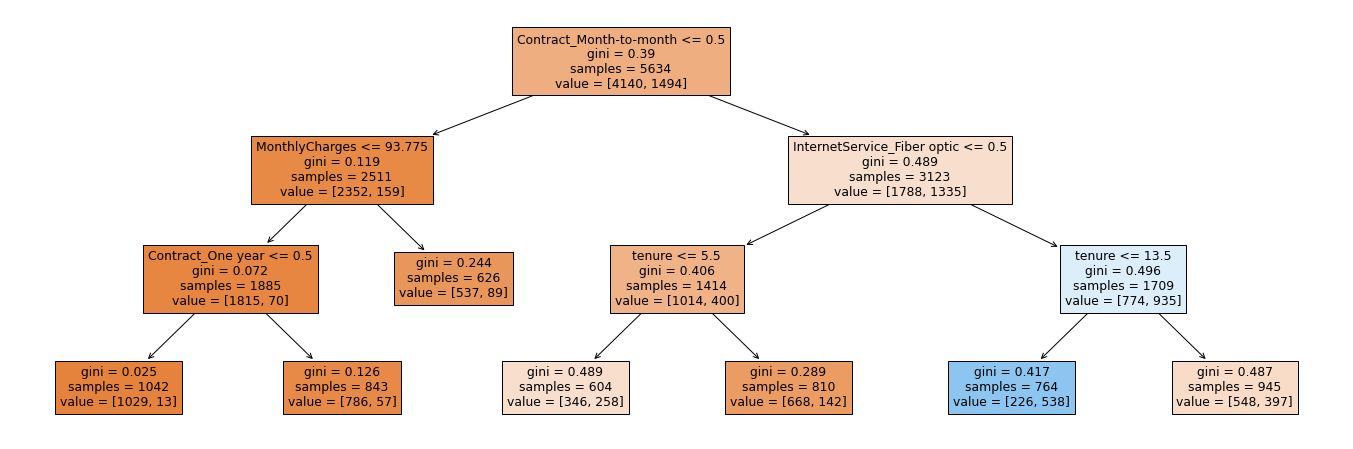

In [110]:
plt.figure(figsize=(24,8))
tree.plot_tree(clf2, feature_names=X.columns, filled=True)